In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install googletrans
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 9.1 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 9.4 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 9.7 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 9.7 MB/s eta 0:00:01
     ------------------------------- -------- 10.0/12.8 MB 9.7 MB/s eta 0:00:01
     ------------------------------------- -- 12.1/12.8 MB 9.8 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 9.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\mazha\appdata\local\temp\pip-req-build-370apihj
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup

  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\mazha\AppData\Local\Temp\pip-req-build-370apihj'


#### Data loading and preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [7]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/IMDB-Dataset.csv')

In [8]:
df.shape

(50000, 2)

In [11]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Preprocessing

In [34]:
df['word_counts'] = df['review'].apply(lambda x: ps.word_count(x))
df['char_counts'] = df['review'].apply(lambda x: ps.char_count(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.avg_word_len(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.stop_words_count(x))

df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))
df['review'] = df['review'].str.lower()

C:\Users\mazha\anaconda3\Lib\site-packages\preprocess_kgptalkie\text_preprocess.py:92: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text()


**Stop Words**

Stop words are common words in any language that occur with a high frequency but carry much less substantive information about the meaning of a phrase.

Examples of some common stop words include:
a, the, and , or , of , on , this , we , were, is, not …

They are usually removed from text in order to decrease processing time.

In [45]:
df['review_withoout_stopwords'] = df['review'].apply(lambda x: ps.remove_stop_words(x))

In [47]:
df.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,review_withoout_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,147,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,75,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,87,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,4.427536,67,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,111,"petter mattei's ""love time money"" visually stu..."


#### Data Visualization

In [50]:
import seaborn as sns

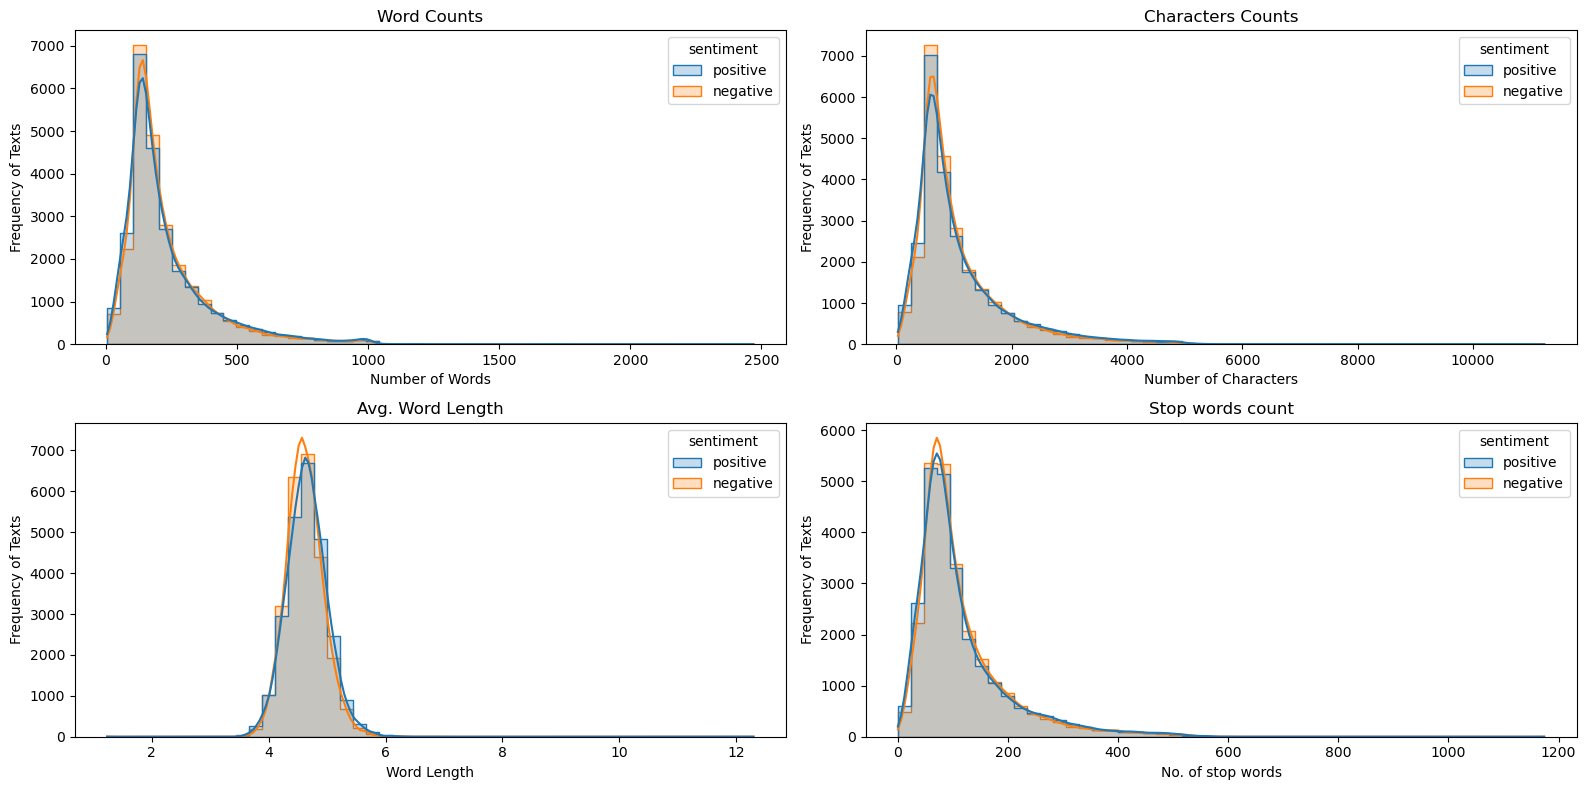

In [100]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plot = sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True, element='step', bins=50)
plt.xlabel("Number of Words")  
plt.ylabel("Frequency of Texts")
plt.title('Word Counts')

plt.subplot(2,2,2)
plot = sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True, element='step', bins=50)
plt.xlabel("Number of Characters")  
plt.ylabel("Frequency of Texts")
plt.title('Characters Counts')

plt.subplot(2,2,3)
plot = sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True, element='step', bins=50)
plt.xlabel("Word Length")  
plt.ylabel("Frequency of Texts")
plt.title('Avg. Word Length')

plt.subplot(2,2,4)
plot = sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True, element='step', bins=50)
plt.xlabel("No. of stop words")  
plt.ylabel("Frequency of Texts")
plt.title('Stop words count')

plt.tight_layout()
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=0, stratify=df['sentiment'])

In [112]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [114]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [116]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [118]:
y_pred = clf.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

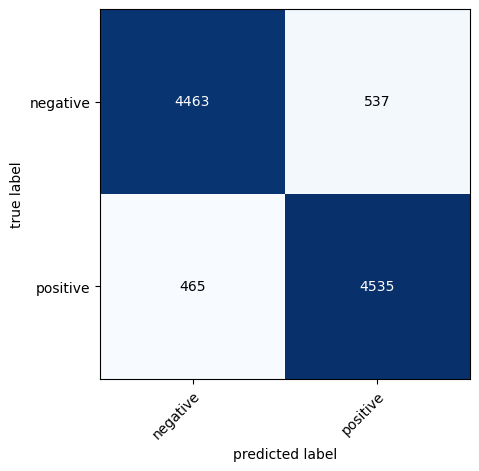

In [124]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names = clf.classes_)

In [126]:
import pickle

In [134]:
pickle.dump(clf, open('sentiment_analysis.pkl'), 'wb')

FileNotFoundError: [Errno 2] No such file or directory: '/sentiment_analysis.pkl'